In [1]:
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
# FUNC_ANNOT = "pathway"
# FUNC_ANNOT = "COG"
FUNC_ANNOT = "regulon"

In [4]:
muts_df = pd.read_pickle("./data/4_6_df.pkl") 
display(len(muts_df))

2537

In [32]:
assoc_muts_df = pd.DataFrame()
for _, r in muts_df.iterrows():
    for f in r["genetic features"]:
#         if conds.issubset(f["significantly associated conditions"]):
        if f["significantly associated conditions"] == {"511145", "M9"}:  # want those genetic features that are strictly associated to this conditions
            assoc_muts_df = assoc_muts_df.append(r)
assoc_muts_df.head()

,Details,Mut ID,Mutation Type,Position,RBS,Reference Seq,RegulonDB Gene,Sequence Change,TFBS,TSS,ale,attenuator terminator,base-media,carbon-source,cis-regulatory RNA,coding,disrupt,exp,flask,gene RegulonDB ID,gene count,genetic,genetic features,genomic features,index,isolate,mutation size,mutation target annotation,nitrogen-source,oriC,phosphorous-source,presence,promoter,pseudogene,range,regulators,repaired,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
219,None,NaN,DEL,3815859.0,{},NaN,rph,Δ82 bp,{},{},3.0,{ECK125144791},M9,U-13C glucose(2),{},1.0,1.0,C13,133.0,{ECK120000854},1.0,1.0,"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...","[{'name': 'rph-pyrE attenuator terminator', 'R...",4,1.0,82.0,rph,NH4Cl(1),0.0,KH2PO4(3),1.00,{},0.0,"(3815859, 3815940)",[],0.0,BOP27,MgSO4(0.24),trace elements,511145,1.0,37 celsius,{}
223,None,NaN,DEL,3815859.0,{},NaN,rph,Δ82 bp,{},{},4.0,{ECK125144791},M9,U-13C glucose(2),{},1.0,1.0,C13,135.0,{ECK120000854},1.0,1.0,"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...","[{'name': 'rph-pyrE attenuator terminator', 'R...",4,1.0,82.0,rph,NH4Cl(1),0.0,KH2PO4(3),1.00,{},0.0,"(3815859, 3815940)",[],0.0,BOP27,MgSO4(0.24),trace elements,511145,1.0,37 celsius,{}
248,coding (1372‑1376/2547 nt),NaN,DEL,3992524.0,{},NaN,cyaA,(CGGGC)2→1,{},{},9.0,{},M9,glucose(4),{},1.0,1.0,Central_carbon_knockout_PTS,131.0,{ECK120000166},1.0,1.0,"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",11,0.0,1.0,cyaA,NH4Cl(1),0.0,KH2PO4(2),1.00,{},0.0,"(3992524, 3992524)","[{'name': 'CRP', 'significantly associated con...",0.0,Δpts,MgSO4(3),trace elements,511145,1.0,37 celsius,{}
367,P246Q (CCG→CAG),NaN,SNP,4186086.0,{},NaN,rpoC,C→A,{},{},8.0,{},M9,glucose(4),{},1.0,0.0,Central_carbon_knockout_pgi,110.0,{ECK120000886},1.0,1.0,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...","[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",316,0.0,1.0,rpoC,NH4Cl(1),0.0,KH2PO4(2),1.00,{ECK125239981},0.0,"(4186086, 4186086)",[],0.0,Δpgi,MgSO4(3),trace elements,511145,1.0,37 celsius,{}
371,coding (1372‑1376/2547 nt),NaN,DEL,3992524.0,{},NaN,cyaA,(CGGGC)2→1,{},{},9.0,{},M9,glucose(4),{},1.0,1.0,Central_carbon_knockout_pgi,39.0,{ECK120000166},1.0,1.0,"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",321,0.0,1.0,cyaA,NH4Cl(1),0.0,KH2PO4(2),0.89,{},0.0,"(3992524, 3992524)","[{'name': 'CRP', 'significantly associated con...",0.0,Δpgi,MgSO4(3),trace elements,511145,1.0,37 celsius,{}


In [19]:
# processing to help a cleaner order of features.
# sorts mutations by position so that mutations to proximal features will be inserted into flow_df next to each other.
assoc_muts_df = assoc_muts_df.sort_values(by="Position")
assoc_muts_df.head()

,Details,Mut ID,Mutation Type,Position,RBS,Reference Seq,RegulonDB Gene,Sequence Change,TFBS,TSS,ale,attenuator terminator,base-media,carbon-source,cis-regulatory RNA,coding,disrupt,exp,flask,gene,gene count,genetic,genetic features,genomic features,index,isolate,mutation size,mutation target annotation,nitrogen-source,oriC,phosphorous-source,presence,promoter,pseudogene,range,repaired,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,genetic feature links,operons,operon links,COGs,COG links,regulators,regulator links,pathways,pathway links
454,H366H (CAC→CAT),NaN,SNP,1196220.0,{},NaN,icd,C→T,{},{},13.0,{},M9,glucose(4),{},1.0,0.0,Central_carbon_knockout_tpiA,89.0,{ECK120000482},1.0,1.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",17,0.0,1.0,icd,NH4Cl(1),0.0,KH2PO4(2),0.51,{},0.0,"(1196220, 1196220)",0.0,Δtpi,MgSO4(3),trace elements,511145,1.0,37 celsius,{},{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...
2800,H366H (CAC→CAT),NaN,SNP,1196220.0,{},NaN,icd,C→T,{},{},8.0,{},M9,glucose(4) or acetate(4),{},1.0,0.0,SSW_GLU_AC,91.0,{ECK120000482},1.0,1.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",29,5.0,1.0,icd,NH4Cl(1),0.0,KH2PO4(3),1.00,{},0.0,"(1196220, 1196220)",0.0,BOP27,MgSO4(0.24),trace elements,511145,1.0,37 celsius,{},{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...
522,H366H (CAC→CAT),NaN,SNP,1196220.0,{},NaN,icd,C→T,{},{},30.0,{},M9,Glucose(4),{},1.0,0.0,EEP_menF_entC,83.0,{ECK120000482},1.0,1.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",12,0.0,1.0,icd,NH4Cl(1),0.0,KH2PO4(3),1.00,{},0.0,"(1196220, 1196220)",0.0,BOP27_menF_entC_A39_F91_I0_R1,MgSO4(0.24),,511145,1.0,37 celsius,{},{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...
2765,H366H (CAC→CAT),NaN,SNP,1196220.0,{},NaN,icd,C→T,{},{},7.0,{},M9,glucose(4) or acetate(4),{},1.0,0.0,SSW_GLU_AC,90.0,{ECK120000482},1.0,1.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",29,5.0,1.0,icd,NH4Cl(1),0.0,KH2PO4(3),1.00,{},0.0,"(1196220, 1196220)",0.0,BOP27,MgSO4(0.24),trace elements,511145,1.0,37 celsius,{},{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...
2655,H366H (CAC→CAT),NaN,SNP,1196220.0,{},NaN,icd,C→T,{},{},2.0,{},M9,glucose(2),{},1.0,0.0,PGI,50.0,{ECK120000482},1.0,1.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",6,1.

In [20]:
col_l = [
    "Mutation Type",
    "disrupt",
    "repaired",
    "genomic features",
    "genetic features",
    "genetic feature links",
    "operons",
    "operon links",
    "regulators",
    "regulator links",
    "COGs",
    "COG links",
    "pathways",
    "pathway links",
    "exp",
    "RegulonDB Gene"  # for debugging
]

annot_df = assoc_muts_df.copy()
annot_df = annot_df[col_l]
# annot_df["mutation effect"] = annot_df.apply(lambda mut_row:"repaired" if mut_row["repaired"] else ("disrupt" if mut_row["disrupt"] else "unknown"), axis=1)


display(annot_df.shape, annot_df.head())

(199, 16)

,Mutation Type,disrupt,repaired,genomic features,genetic features,genetic feature links,operons,operon links,regulators,regulator links,COGs,COG links,pathways,pathway links,exp,RegulonDB Gene
454,SNP,0.0,0.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...,Central_carbon_knockout_tpiA,icd
2800,SNP,0.0,0.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...,SSW_GLU_AC,icd
522,SNP,0.0,0.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...,EEP_menF_entC,icd
2765,SNP,0.0,0.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...,SSW_GLU_AC,icd
2655,SNP,0.0,0.0,"[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...","[{'name': 'icd', 'RegulonDB ID': 'ECK120000482...",{'ECK120000482': ['ECK120000482']},"[{'name': 'icd', 'RegulonDB ID': 'ECK120015843...",{'ECK120015843': ['ECK120000482']},"[{'name': 'ArcA', 'mutation set count': 49.0, ...","{'ArcA': ['icd'], 'Cra': ['icd']}","[{'name': 'Energy production and conversion', ...",{'Energy production and conversion': ['ECK1200...,"[{'name': 'Citrate cycle (TCA cycle)', 'mutati...",{'Citrate cycle (TCA cycle)': ['ECK120015843']...,PGI,icd


In [21]:
# Just removing all "Function unknown" links since connections to this COG isn't useful.
for i, r in annot_df.iterrows():
    if "Function unknown" in r["COG links"].keys():
        del r["COG links"]["Function unknown"]

In [22]:
mut_type_feat_effect_counts = dict()
genomic_feat_counts = dict()
genetic_feat_counts = dict()
operon_counts = dict()
COG_counts = dict()
regulator_counts = dict()
pathway_counts = dict()
# Using the individual feature columns rather than link columns because this guarantees considering all linked and non-linked features
# for each of these levels, except genomic features.
for _, r in annot_df.iterrows():
    
    for genomic_feat in r["genomic features"]:
        
        # These are usually exclusive of each other per feature.
        # There is a design problem here: A multi-feature mutation could disrupt feature (gene) and repair another. Need to measure the predicted effect per feature rather than mutation to enable this (considering a design bug fix).
        effect = ""
        if r["disrupt"]: effect = "disrupt"
        if r["repaired"]: effect = "repair"
        
        feat = genomic_feat["name"]
        if "attenuator terminator" in feat:
            feat = feat.replace("attenuator terminator", "att term")
        if "terminator" in feat:
            feat = feat.replace("terminator", "term")
            
        mut_type_feat_effect = feat + ' ' + r["Mutation Type"] + ' ' + effect
        if mut_type_feat_effect not in mut_type_feat_effect_counts.keys():
            mut_type_feat_effect_counts[mut_type_feat_effect] = 0
        mut_type_feat_effect_counts[mut_type_feat_effect] += 1
    
    for genomic_feat in r["genomic features"]:
        genomic_feat_annot = genomic_feat["RegulonDB ID"] #+ ' ' + r["Mutation Type"]
        if genomic_feat_annot not in genomic_feat_counts.keys():
            genomic_feat_counts[genomic_feat_annot] = 0
        genomic_feat_counts[genomic_feat_annot] += 1

    for genetic_feat, links in r["genetic feature links"].items():
        if genetic_feat not in genetic_feat_counts.keys():
            genetic_feat_counts[genetic_feat] = 0
        genetic_feat_counts[genetic_feat] += len(links)

    # count the operons according to the amount of links from genes since an operon is only included if its gene is hit.
    for operon, links in r["operon links"].items():
        if operon not in operon_counts.keys():
            operon_counts[operon] = 0
        operon_counts[operon] += len(links)

    # count the COGs according to the amount of links from operons since a COG is only included if linked to a mutated operon (its genes)
    for COG, links in r["COG links"].items():
        if COG not in COG_counts.keys():
            COG_counts[COG] = 0
        COG_counts[COG] += len(links)
        
    for reg, links in r["regulator links"].items():
        if reg not in regulator_counts.keys():
            regulator_counts[reg] = 0
        regulator_counts[reg] += len(links)
        
    for pathway, links in r["pathway links"].items():
        if pathway not in pathway_counts.keys():
            pathway_counts[pathway] = 0
        pathway_counts[pathway] += len(links)

In [23]:
operon_df = pd.read_csv("./data/RegulonDB10/operon.txt", sep="\t", comment='#', header=None)
operon_df.columns = [
    "OPERON_ID",
    "OPERON_NAME",
    "FIRSTGENEPOSLEFT",
    "LASTGENEPOSRIGHT",
    "REGULATIONPOSLEFT",
    "REGULATIONPOSRIGHT",
    "OPERON_STRAND",
    "OPERON_INTERNAL_COMMENT",
    "KEY_ID_ORG"]
operon_df["range"] = operon_df.apply(lambda row: (row["REGULATIONPOSLEFT"], row["REGULATIONPOSRIGHT"]), axis=1)

In [24]:
# operon names can be the same as a gene, which is problemmatic for floweaver
def _adjust_name_for_floweaver(operon):
    return operon + ' '


def _get_feat_d(json, RegulonDB_ID=None, name=None):
    feat_d = dict()
    for d in json:
        if (RegulonDB_ID and d["RegulonDB ID"] == RegulonDB_ID) or (name and d["name"] == name):
            feat_d = d
            break
    return feat_d


# Will probably have to put elsewhere at some point due to annotation work (count, significance)
mut_feat_effects = list()
genomic_feats = list()
genetic_feats = list()
operons = list()
COGs = list()
regulators = list()
pathways = list()


flow_df = pd.DataFrame()
for _, r in annot_df.iterrows():

    for genomic_feat_d in r["genomic features"]:
        
        effect = ""
        if r["disrupt"]: effect = "disrupt"
        if r["repaired"]: effect = "repair"
            
        feat = genomic_feat_d["name"]
        if "attenuator terminator" in feat:
            feat = feat.replace("attenuator terminator", "att term")
        if "terminator" in feat:
            feat = feat.replace("terminator", "term")
            
        mut_type_feat_effect = feat + ' ' + r["Mutation Type"] + ' ' + effect
        mut_type_feat_effect = str(mut_type_feat_effect_counts[mut_type_feat_effect]) + ' ' + mut_type_feat_effect
        mut_feat_effects.append(mut_type_feat_effect)
            
        genomic_feat_annot = ""
        mut_count = genomic_feat_counts[genomic_feat_d["RegulonDB ID"]]
#         if genomic_feat_d["significant"] and mut_count > 1: genomic_feat_annot += "*"
        genomic_feat_annot += str(mut_count) + ' '
        genomic_feat_annot += str(feat)
        flow_row = {
            "source": genomic_feat_annot,
            "target": mut_type_feat_effect,
#                 "type": r["mutation effect"],
            "type": r["exp"],
#             "type": "unknown",
            "value": 1
        }
        flow_df = flow_df.append(flow_row, ignore_index=True)
        
    
    
    for genetic_feat_ID, genomic_feat_set in r["genetic feature links"].items():
        genetic_feat_d = _get_feat_d(RegulonDB_ID=genetic_feat_ID, json=r["genetic features"])
        genetic_feat_annot = ""
        mut_count = genetic_feat_counts[genetic_feat_ID]
#         if genetic_feat_d["significant"] and mut_count > 1: genetic_feat_annot += "*"
        genetic_feat_annot += str(mut_count) + ' '
        genetic_feat_annot += str(genetic_feat_d["name"])
        genetic_feats.append(genetic_feat_annot)
        for genomic_feat_ID in genomic_feat_set:
            genomic_feat_d = _get_feat_d(RegulonDB_ID=genomic_feat_ID, json=r["genomic features"])
            k = genomic_feat_ID #+ ' ' + r["Mutation Type"]
            genomic_feat_annot = ""
            mut_count = genomic_feat_counts[k]
#             if genomic_feat_d["significant"] and mut_count > 1: genomic_feat_annot += "*"
            genomic_feat_annot += str(mut_count) + ' '
    
            # This is copy-pasted from above. Should refactor
            feat = genomic_feat_d["name"]
            feat = genomic_feat_d["name"]
            if "attenuator terminator" in feat:
                feat = feat.replace("attenuator terminator", "att term")
            if "terminator" in feat:
                feat = feat.replace("terminator", "term")
                
            genomic_feat_annot += str(feat) #+ ' ' + r["Mutation Type"]
#             if r["disrupt"]: genomic_feat_annot += " disrupt"
#             if r["repaired"]: genomic_feat_annot += " repair"
            genomic_feats.append(genomic_feat_annot)
            flow_row = {
                "source": genetic_feat_annot,
                "target": genomic_feat_annot,
#                 "type": r["mutation effect"],
                "type": r["exp"],
#                 "type": "unknown",
                "value": 1
            }
            flow_df = flow_df.append(flow_row, ignore_index=True)
    
    
    for operon_id, gen_targs in r["operon links"].items():
        operon_d = _get_feat_d(RegulonDB_ID=operon_id, json=r["operons"])
        operon_name = _adjust_name_for_floweaver(operon_d["name"])
        operon_annot = ""
        mut_count = operon_counts[operon_id]
#         if operon_d["significant"] and mut_count > 1: operon_annot += "*"
        operon_annot += str(mut_count) + ' '
        operon_annot += operon_name
        operons.append(operon_annot)
        for genetic_feat_ID in gen_targs:
            genetic_feat_d = _get_feat_d(RegulonDB_ID=genetic_feat_ID, json=r["genetic features"])
            genetic_feat_annot = ""
            mut_count = genetic_feat_counts[genetic_feat_ID]
#             if genetic_feat_d["significant"] and mut_count > 1: genetic_feat_annot += "*"
            genetic_feat_annot += str(mut_count) + ' '
            genetic_feat_annot += str(genetic_feat_d["name"])
            genetic_feats.append(genetic_feat_annot)
            flow_row = {
                "source": operon_annot,
                "target": genetic_feat_annot,
#                 "type": r["mutation effect"],
                "type": r["exp"],
#                 "type": "unknown",
                "value": 1
            }
            flow_df = flow_df.append(flow_row, ignore_index=True)
            
            
    if FUNC_ANNOT == "pathway":
        for pathway, ops in r["pathway links"].items():
#             if pathway == "Glycerolipid metabolism":  # for GYD Glycerolipid metabolism.
            pathway_feat_d = _get_feat_d(name=pathway, json=r["pathways"])
            pathway_annot = ""
            mut_count = pathway_counts[pathway]
#             if pathway_feat_d["significant"] and mut_count > 1: pathway_annot += "*"
            pathway_annot += str(mut_count) + ' ' + pathway_feat_d["name"]
            pathways.append(pathway_annot)
            for operon_id in ops:
                op_feat_d = _get_feat_d(RegulonDB_ID=operon_id, json=r["operons"])
                operon_name = operon_df[operon_df["OPERON_ID"]==operon].iloc[0]["OPERON_NAME"]
                operon_name = _adjust_name_for_floweaver(op_feat_d["name"])
                operon_annot = ""
                mut_count = operon_counts[op_feat_d["RegulonDB ID"]]
#                 if op_feat_d["significant"] and mut_count > 1: operon_annot += "*"
                operon_annot += str(mut_count) + ' '
                operon_annot += operon_name
                operons.append(operon_annot)
                flow_row = {
                    "source": pathway_annot,
                    "target": operon_annot,
#                     "type": r["mutation effect"],
                    "type": r["exp"],
#                     "type": "unknown",
                    "value": 1
                }
                flow_df = flow_df.append(flow_row, ignore_index=True)
            
            
    if FUNC_ANNOT == "regulon":
        for regulator, ops in r["regulator links"].items():
#             if regulator == "CRP":  # for GYD CRP fig
#             if regulator == "GlpR":  # for GYD GlpR fig
#             if regulator == "Mlc":  # for GYD Mlc fig
            reg_feat_d = _get_feat_d(name=regulator, json=r["regulators"])
            reg_annot = ""
            mut_count = regulator_counts[regulator]
#             if reg_feat_d["significant"] and mut_count > 1: reg_annot += "*"
            reg_annot += str(mut_count) + ' ' + reg_feat_d["name"]
            regulators.append(reg_annot)
            for operon_name in ops:
                op_feat_d = _get_feat_d(name=operon_name, json=r["operons"])
                operon_name = _adjust_name_for_floweaver(op_feat_d["name"])
                operon_annot = ""
                mut_count = operon_counts[op_feat_d["RegulonDB ID"]]
#                 if op_feat_d["significant"] and mut_count > 1: operon_annot += "*"
                operon_annot += str(mut_count) + ' '
                operon_annot += operon_name
                operons.append(operon_annot)
                flow_row = {
                    "source": reg_annot,
                    "target": operon_annot,
#                     "type": r["mutation effect"],
                    "type": r["exp"],
#                     "type": "unknown",
                    "value": 1
                }
                flow_df = flow_df.append(flow_row, ignore_index=True)

                
    if FUNC_ANNOT == "COG":
        for COG, ops in r["COG links"].items():
#             if COG == "Nucleotide transport and metabolism":
            COG_feat_d = _get_feat_d(name=COG, json=r["COGs"])
            COG_annot = ""
            mut_count = COG_counts[COG]
#             if COG_feat_d["significant"] and mut_count > 1: COG_annot += "*"
            COG_annot += str(mut_count) + ' ' + COG_feat_d["name"]
            COGs.append(COG_annot)
            for operon_id in ops:
                op_feat_d = _get_feat_d(RegulonDB_ID=operon_id, json=r["operons"])
                operon_name = operon_df[operon_df["OPERON_ID"]==operon].iloc[0]["OPERON_NAME"]
                operon_name = _adjust_name_for_floweaver(op_feat_d["name"])
                operon_annot = ""
                mut_count = operon_counts[op_feat_d["RegulonDB ID"]]
#                 if op_feat_d["significant"] and mut_count > 1: operon_annot += "*"
                operon_annot += str(mut_count) + ' '
                operon_annot += operon_name
                operons.append(operon_annot)
                flow_row = {
                    "source": COG_annot,
                    "target": operon_annot,
#                     "type": r["mutation effect"],
                    "type": r["exp"],
#                     "type": "unknown",
                    "value": 1
                }
                flow_df = flow_df.append(flow_row, ignore_index=True)

    
display(flow_df[:20])

,source,target,type,value
0,49 icd,49 icd SNP,Central_carbon_knockout_tpiA,1.0
1,49 icd,49 icd,Central_carbon_knockout_tpiA,1.0
2,49 icd,49 icd,Central_carbon_knockout_tpiA,1.0
3,49 ArcA,49 icd,Central_carbon_knockout_tpiA,1.0
4,49 Cra,49 icd,Central_carbon_knockout_tpiA,1.0
5,49 icd,49 icd SNP,SSW_GLU_AC,1.0
6,49 icd,49 icd,SSW_GLU_AC,1.0
7,49 icd,49 icd,SSW_GLU_AC,1.0
8,49 ArcA,49 icd,SSW_GLU_AC,1.0
9,49 Cra,49 icd,SSW_GLU_AC,1.0


In [25]:
# processing to help a cleaner order of features.
# remove duplicates but maintains the order established above
def remove_duplicates(feats):
    l = list()
    for x in feats:
        if x not in l:
            l.append(x)
    return l

mut_feat_effects = remove_duplicates(mut_feat_effects)
genomic_feats = remove_duplicates(genomic_feats)
genetic_feats = remove_duplicates(genetic_feats)
operons = remove_duplicates(operons)
pathways = remove_duplicates(pathways)
regulators = remove_duplicates(regulators)
COGs = remove_duplicates(COGs)

In [26]:
from ipysankeywidget import SankeyWidget
from floweaver import *


nodes = {
    "mutation": ProcessGroup(mut_feat_effects, title="mutation"),
    "genomic feature": ProcessGroup(genomic_feats, title="genomic feature"),
    "genetic feature": ProcessGroup(genetic_feats, title="genetic feature"),
    "operon": ProcessGroup(operons, title="operon"),
}

l = []
if FUNC_ANNOT == "pathway":
    l = pathways
if FUNC_ANNOT == "regulon":
    l = regulators
if FUNC_ANNOT == "COG":
    l = COGs
nodes[FUNC_ANNOT] = ProcessGroup(l, title=FUNC_ANNOT)


# !!! These partition DFs need to have accessible variables (ex: mut_type_partition) accessible external to the nodes
# otherwise floweaver will crash during its rendering step.
mutation_partition = Partition.Simple("process", mut_feat_effects)
nodes["mutation"].partition = mutation_partition

genomic_feat_partition = Partition.Simple("process", genomic_feats)
nodes["genomic feature"].partition = genomic_feat_partition

genetic_feat_partition = Partition.Simple("process", genetic_feats)
nodes["genetic feature"].partition = genetic_feat_partition

operon_partition = Partition.Simple("process", operons)
nodes["operon"].partition = operon_partition

nodes[FUNC_ANNOT].partition = Partition.Simple("process", l)


# The order that the labels is entered into the bundles is explicit. Don't arbitrarily give an order.
bundles = [
    Bundle(
        "genomic feature",
        "mutation"
    ),
    Bundle(
        "genetic feature",
        "genomic feature",
    ),
    Bundle(
        "operon",
        "genetic feature",
    ),
    Bundle(
        FUNC_ANNOT,
        "operon",
    ),
]


ordering = [
    [FUNC_ANNOT],
    ["operon"],
    ["genetic feature"],
    ["genomic feature"],
    ["mutation"]
]

#
# mut_effect_partition = Partition.Simple(
#     "type", ["unknown", "disrupt", "repaired"])

exp_colors_d = {
    '42C': '#800000',
    'C13': '#9A6324',
    'Central_carbon_knockout_PTS': '#808000',
    'Central_carbon_knockout_glucose_evolution': '#469990',
    'Central_carbon_knockout_gnd': '#000075',
    'Central_carbon_knockout_pgi': '#4363d8',
    'Central_carbon_knockout_sdh': '#f58231',
    'Central_carbon_knockout_tpiA': '#ffe119',
    'EEP_menF_entC': '#bfef45',
    'GLU': '#3cb44b',
    'GYD': '#e6194B',
    'PGI': '#42d4f4',
    'SER': '#911eb4',
    'SSW_AC': '#f032e6',
    'SSW_GLU_AC': '#fabebe',
    'SSW_GLU_GLY': '#ffd8b1',
    'SSW_GLU_XYL': '#fffac8',
    'SSW_GLY': '#aaffc3',
    'SSW_XYL': '#e6beff'
}

exp_flow_partition = Partition.Simple(
    "type", list(exp_colors_d.keys()))

sdd = SankeyDefinition(nodes,
                       bundles,
                       ordering,
                       flow_partition=exp_flow_partition
                       )


# p_d = {"disrupt": "#C44E52", "unknown": "#6BAAD3", "repaired": "#55A868"}
size = dict(width=1250, height=500)
results = weave(sdd,
                flow_df,
                palette=exp_colors_d,
                ).to_widget(
    margins=dict(left=400, right=350),
    **size)
results.auto_save_svg("mutflow.svg")
results.auto_save_png("mutflow.png")
results

SankeyWidget(groups=[{'id': 'regulon', 'type': 'process', 'title': 'regulon', 'nodes': ['regulon^49 ArcA', 're…

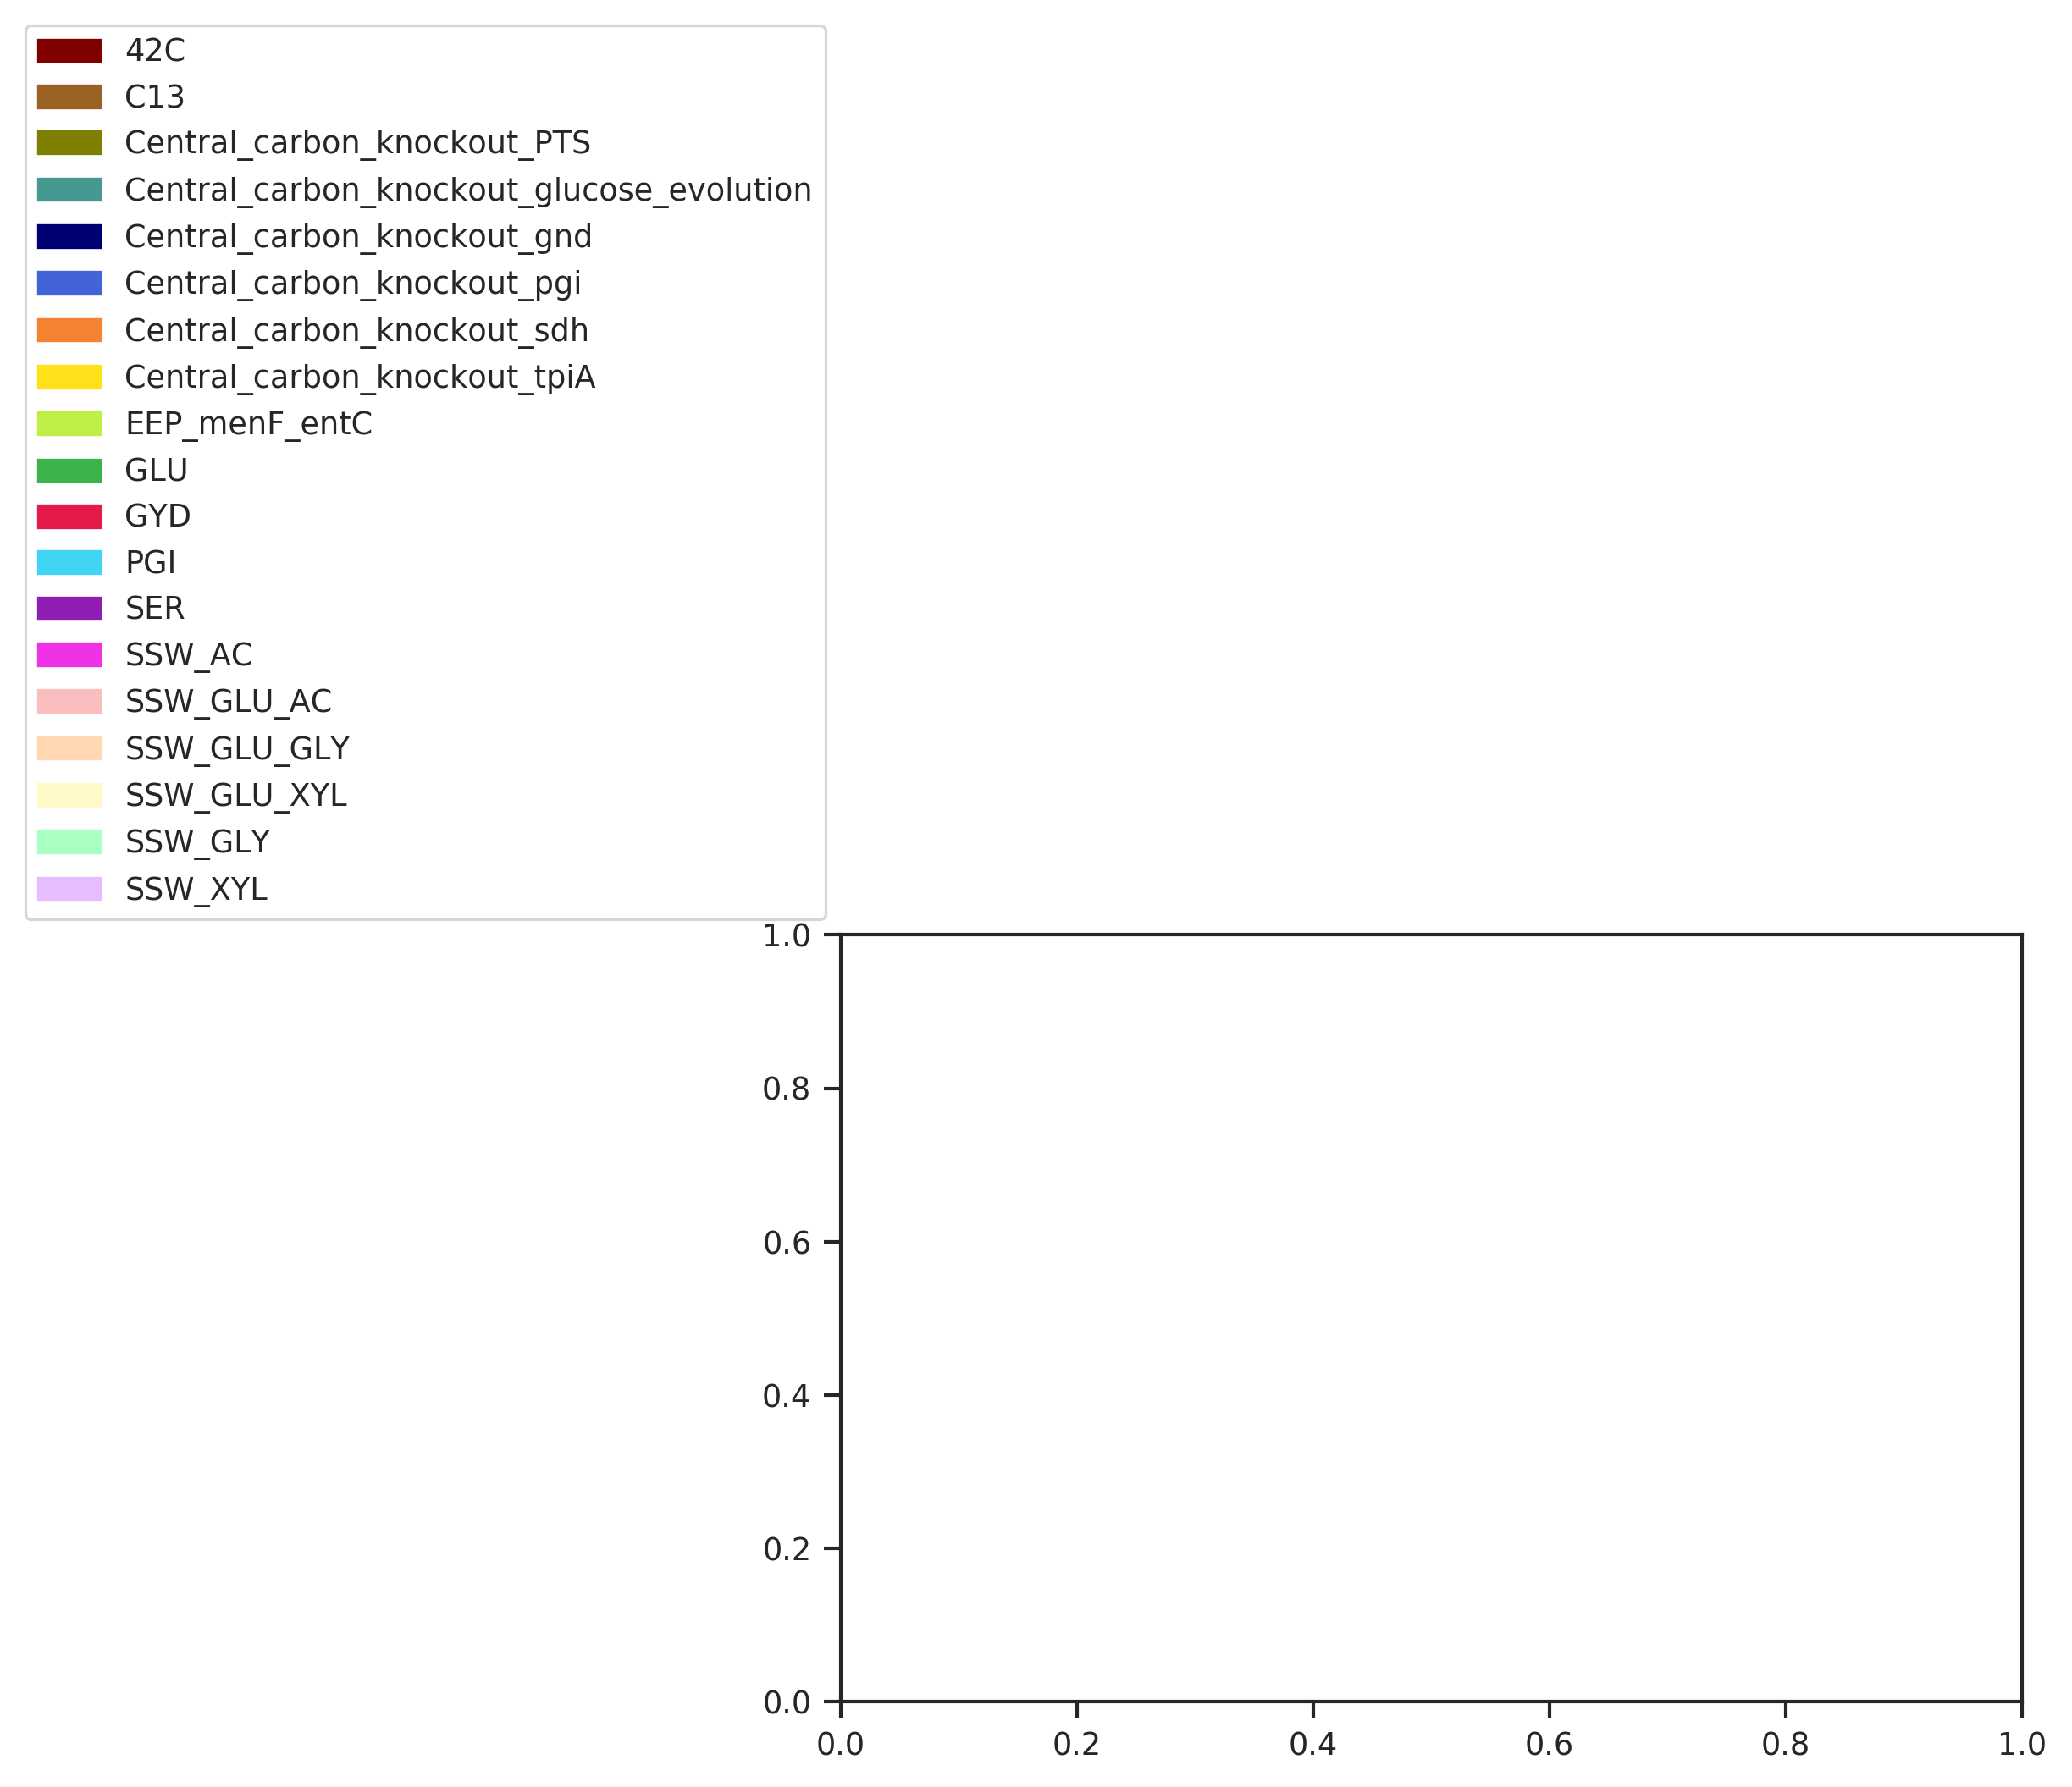

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")
from matplotlib.patches import Patch

legend_elements = []
for k, v in exp_colors_d.items():
    legend_elements.append(Patch(label=k, color=v))

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, bbox_to_anchor=(0, 1), loc='lower right', ncol=1)
# ax.legend()
plt.show()

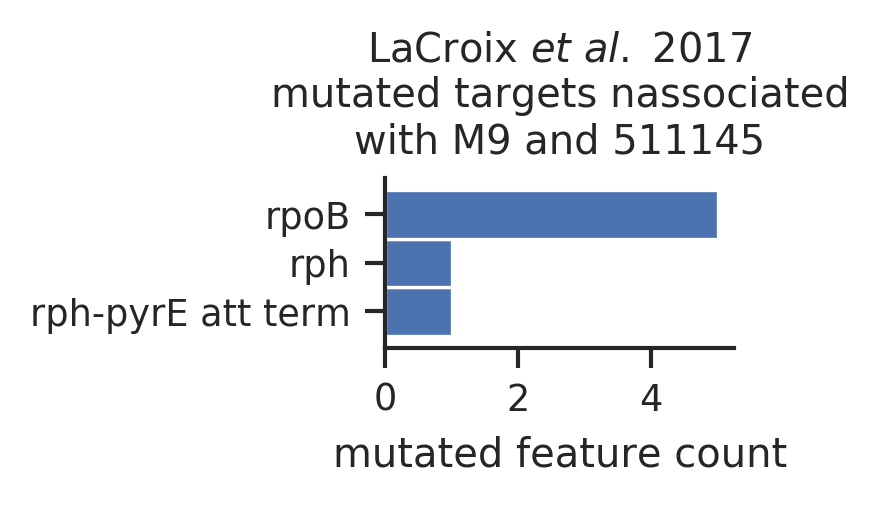

In [28]:
d = {}
for _, m in assoc_muts_df.iterrows():
    if m.exp == "GYD":
        for feat in m["genomic features"]:
            feat_name = feat["name"]
            feat_name = feat_name.replace("attenuator terminator", "att term")
            if feat_name in d.keys():
                d[feat_name] += 1
            else:
                d[feat_name] = 1

df = pd.DataFrame()
for k, v in d.items():
    df = df.append({"mutated feature": k, "count": v}, ignore_index=True)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")


ax = df.plot.barh(
# ax = df.plot.bar(
    y="count",
    x="mutated feature",
    color="#4C72B0",
#     figsize=(0.75,2),
    figsize=(1.5,0.75),
    width=1
)


ax.set_title("LaCroix $\it{et}$ $\it{al.}$ 2017\nmutated targets nassociated\nwith M9 and 511145")
ax.get_legend().remove()
ax.set_xlabel("mutated feature count")
ax.set_ylabel("")
sns.despine(ax=ax, top=True, right=True)